In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("bangalore_homeprices.csv")
df.sample(5)

,area,bedrooms,price
0,1056,2,39.07
14,2250,3,101.00
3,1521,3,75.00
1,2600,4,120.00
6,2732,4,135.00


In [7]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [10]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b=0
    total_samples = X.shape[0]
    if batch_size > total_samples:
        batch_size = total_samples

    cost_list = []
    epoch_list = []
    num_batches = total_samples/batch_size
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]

        for j in range(0,total_samples,batch_size):
            xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w,xj.T) + b

            w_grad = -(2/len(xj))*(xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(xj))*np.sum(yj-y_predicted)
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
            print(xj,yj,w,b,cost)
            
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list


In [11]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 100,
    batch_size = 5
)
w, b, cost

[[0.08827586 0.25      ]
 [0.86206897 0.75      ]
 [0.5        0.5       ]
 [0.67931034 0.5       ]
 [0.25517241 0.5       ]] [0.05237037 0.91111111 0.51111111 0.51851852 0.20740741] [0.99414954 0.99421633] -0.01073723627075351 0.3097577098907335
[[0.06896552 0.25      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.10344828 0.25      ]
 [0.12758621 0.25      ]] [0.04444444 0.22222222 0.31851852 0.05925926 0.04444444] [0.99295784 0.99155565] -0.01778568840720299 0.1312780255036099
[[0.12931034 0.25      ]
 [0.13793103 0.25      ]
 [0.62068966 0.75      ]
 [0.6662069  0.75      ]
 [0.34482759 0.5       ]] [0.07407407 0.14074074 0.65185185 0.76296296 0.37037037] [0.98868716 0.98620051] -0.026887901943892012 0.24022754599728557
[[1.         1.        ]
 [0.68448276 0.75      ]
 [0.13103448 0.5       ]
 [0.         0.        ]
 [0.17586207 0.5       ]] [1.         0.8        0.11851852 0.         0.13333333] [0.98267453 0.97867201] -0.03686634678037662 0.3462999540451677
[[1.      

(array([0.72465492, 0.69445742]), -0.24775995160050515, 0.004322191119561237)

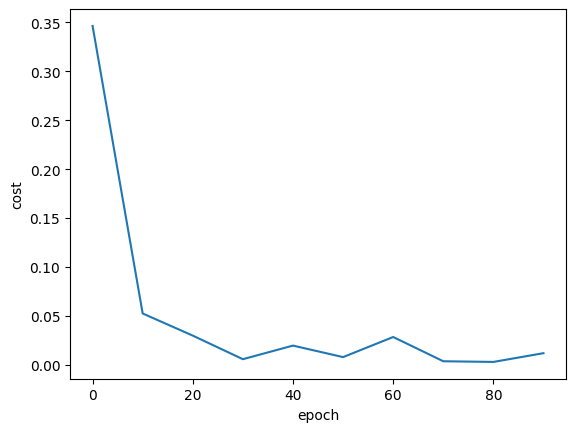

In [16]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)


In [17]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


129.5873044666178

In [18]:
predict(1000,2,w,b)

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


28.73713153196187

In [15]:
predict(1500,3,w,b)

C:\Users\Priyanka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.0420372646409